In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#INTRODUCTION
Credit cards are one of the most commonly used financial tools. However, obtaining a credit card can be a difficult task for many individuals due to various factors such as income level, and employment status. To help streamline the application process and improve the approval rate, machine learning models can be used to predict credit card approval.

---



In this project, i will explore how various factors affect credit card approval rates and use predictive models to improve the accuracy of credit card approval predictions.

This datasheet for cradit card approval.and predicting that wheather the customer is approve for cradit card or not based on actual data of independent variable and dependent variable.

# Attribute Descriptions
##INDEPENDENT VARIABLES
**Gender:** This column indicates the gender of the individual, either male or female. It is a Categorical (binary).

**Car_Owne**r: This column indicates whether the individual owns a car or not, either Yes or No.It is a Categorical (binary).

**Propert_Owne**r: This column indicates whether the individual owns a property or not, either Yes or No.It is a Categorical (binary).

**Children**: This column indicates the number of children the individual has.It is a Numerical(integer).

**Annual_income**: This column contains the annual income of the individual.It is a Numerical (continuous).

**Type_Income**: This column indicates the type of income the individual earns, such as salary or self-employed income.It is a Numerical (nominal).

**Education**: This column indicates the level of education of the individual. It is a Categorical (ordinal).

**Marital_status**: This column indicates the marital status of the individual, such as Single, Married, Divorced, etc. It is a Categorical (nominal).

**Housing_type**: This column indicates the type of housing the individual lives in, such as a house or apartment. It is a Categorical (nominal).

**Birthday_count**: This column contains the age of the individual.It is a Numerical(integer).

**Employed_days**: This column indicates the number of days the individual has been employed.It is a Numerical(integer).

**Mobile_phone, Work_Phone, Phone, and Email_id**: These columns contain contact information for the individual, such as mobile phone number, work phone number, home phone number, and email id.Mobile_phone, Work_Phone, Phone are Categorical (binary) and Email_id is Categorical (nominal).

**Type_Occupation**: This column indicates the type of occupation of the individual, such as healthcare or education. It is a Categorical (nominal).

**Family_Members**: This column indicates the number of family members the individual has.It is a Numeric (integer).

##DEPENDENT VARIABLES
**Label**: This column contains the label for credit card approval, either approved or not approved. It is a Categorical (binary).

#Section 1: Questions to Answer

#1) Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
Ans The proposal to predict credit card approval is highly relevant in today's world due to the increasing use of credit cards as a financial tool. With the rise in e-commerce and online transactions, credit cards have become a primary payment method for many individuals, By accurately predicting, banks can offer credit cards to clients with lower risk profiles, which can ultimately lead to better profitability and improved customer satisfaction.

#2) How is it going to impact the banking sector?
Ans) predicting credit card approval using machine learning can have a transformative impact on the banking sector by improving the customer experience, reducing risk, and increasing profitability..

#3) If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.
Ans) If there is a gap in the knowledge or process used by a bank in India for credit card approval, the proposed method can be helpful for banks in India by improving the accuracy of credit card approval predictions.


#  Data collection

In [ ]:
 #Importing necessarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# import the file of "cradit card .csv" from google drive and load the dataset  name as df
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2232373-Dataset/Credit_card.csv")
df.head(3)  # Display the first  3 rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2


In [ ]:
df.shape #  checking shape of the dataframe there are 18 column and 1548 rows

(1548, 18)

In [ ]:
# import the file of "cradit card label" from google drive and read dataframe name as df1
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2232373-Dataset/Credit_card_label.csv")

In [ ]:
df1.head(3) # display first 3 nos of rows

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1


In [ ]:
df1.shape # for checking shape of the dataframe there are 2 columns and 1548 rows

(1548, 2)

In [ ]:
data=pd.concat([df,df1],axis=1) # combine or concate dataframe df and df1 into one dataframe name as 'data'
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Ind_ID,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,5008827,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009744,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,5009746,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009749,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009752,1


In [ ]:
data.info() # Datatype information of dataframe and Display number of rows, columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
data.columns  # Display the all columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'Ind_ID', 'label'],
      dtype='object')

In [ ]:
column_to_drop = ['Ind_ID','Ind_ID']
data = data.drop(column_to_drop, axis=1) # Drop duplicate column "ind_id"

In [ ]:
data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


# Exploratory data analysis


#Data Cleaning and Data Preprocessing

In [ ]:
data.isnull().sum() # finding the null values.

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
data['GENDER'].isnull().sum() # Display Gender Nullvalue

7

In [ ]:
data['GENDER'].mode()  # Display Gender mode value

0    F
Name: GENDER, dtype: object

In [ ]:
 # Imputing the null value with Mode
data['GENDER'].fillna("F",inplace=True)  # Replace Null values  with the Mode =F (female)


In [ ]:
# converting the negative values to actual age With New column "Age"
data['Age']=abs(round((data['Birthday_count']/-365),0))
# converting negative values to exprience of the employee With New column "Employed_days"
data['Employed_exp']=abs(round((data['Employed_days']/-365),0))
data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Employed_exp
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,51.0,1001.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0,2.0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,NaN,2.0
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0,2.0
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0,2.0


In [ ]:
data['Age'].isnull().sum() # Display  Null Value of "Age"

22

In [ ]:
data['Age'].median()  # Display median age value from "Age" column

43.0

In [ ]:
 # Imputing the null value with Median value
data['Age'].fillna(43,inplace=True) # # Replace Null values  with  Median age value 43


In [ ]:
data['Employed_days'].isnull().sum() # Display  Null Value of "Age"


0

In [ ]:
data['Employed_exp'] #  extreme values  found in "Employed_exp" -1001

0       1001.0
1          2.0
2          2.0
3          2.0
4          2.0
         ...  
1543       6.0
1544       3.0
1545       7.0
1546       2.0
1547       8.0
Name: Employed_exp, Length: 1548, dtype: float64

In [ ]:
data['Employed_exp'].median() # Display the median Value

7.0

In [ ]:
# Replacing the extreme values with Median value.
data['Employed_exp'].replace(1001.0, 7,inplace=True)

In [ ]:
data['Annual_income'].isnull().sum() # Display  Null value

23

In [ ]:
k=data['Annual_income'].median() # Display Median value
k

166500.0

In [ ]:
 # Imputing the null value with Median value
data['Annual_income'].fillna(k,inplace=True) #  Replacing Null value with Median value.


In [ ]:
data['Type_Occupation'].isnull().sum() # Display  Null value

488

In [ ]:
data['Type_Occupation'].value_counts() # Display all category of "Type_Occupation"

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [ ]:
# Replace null value with Other category
data['Type_Occupation'].fillna('Other',inplace=True) # Replacing Null value with "other".


In [ ]:
data['Housing_type'].value_counts() # Display all category of "Housing_type"

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [ ]:
# Removing unused columns
data = data.drop([ 'Mobile_phone','Work_Phone','Phone','EMAIL_ID'], axis=1)


In [ ]:
data = data.drop([ 'Birthday_count','Employed_days'], axis=1)

In [ ]:
data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,Family_Members,label,Age,Employed_exp
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,Other,2,1,51.0,7.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,Other,2,1,37.0,2.0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,Other,2,1,43.0,2.0
3,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,Other,2,1,37.0,2.0
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,Other,2,1,37.0,2.0


# Data Visualisation

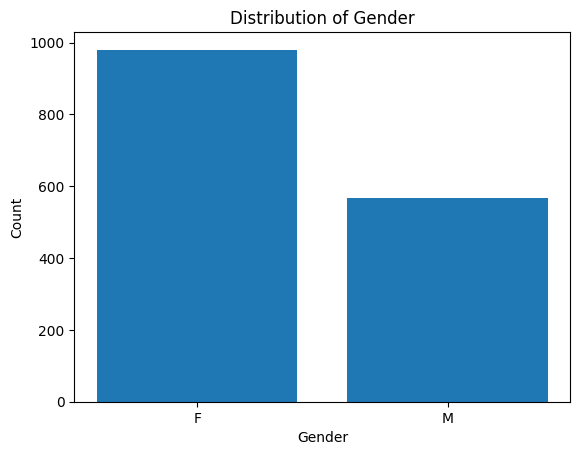

In [ ]:
# count number of males and females
gender_count=data['GENDER'].value_counts()
#creat barpolt using Matplotlib
plt.bar(gender_count.index,gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

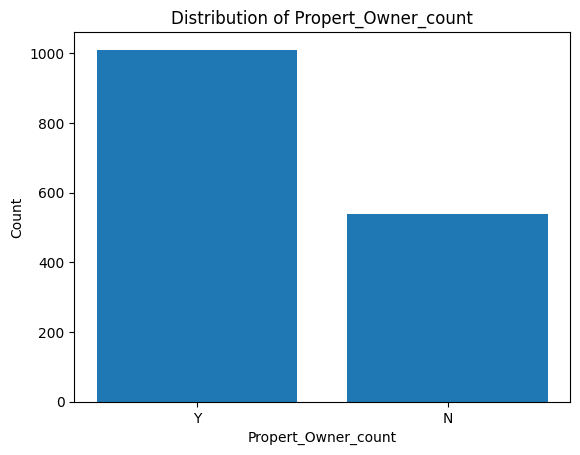

In [ ]:
# count number of Propert_Owner
Propert_Owner_count=data['Propert_Owner'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Propert_Owner_count.index, Propert_Owner_count.values)
plt.xlabel('Propert_Owner_count')
plt.ylabel('Count')
plt.title('Distribution of Propert_Owner_count')
plt.show()

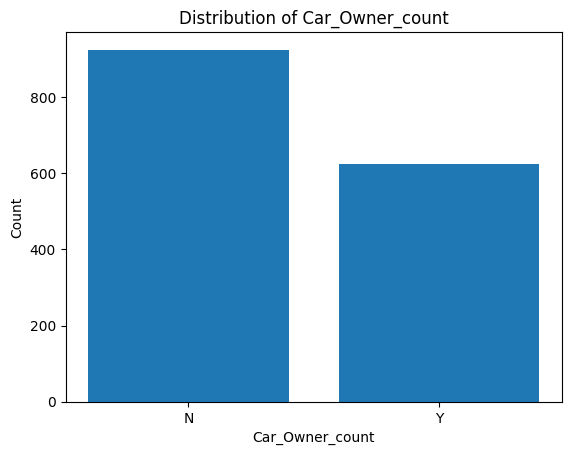

In [ ]:
# count number of Car_Owner_count
Car_Owner_count=data['Car_Owner'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Car_Owner_count.index,Car_Owner_count.values)
plt.xlabel('Car_Owner_count')
plt.ylabel('Count')
plt.title('Distribution of Car_Owner_count')
plt.show()

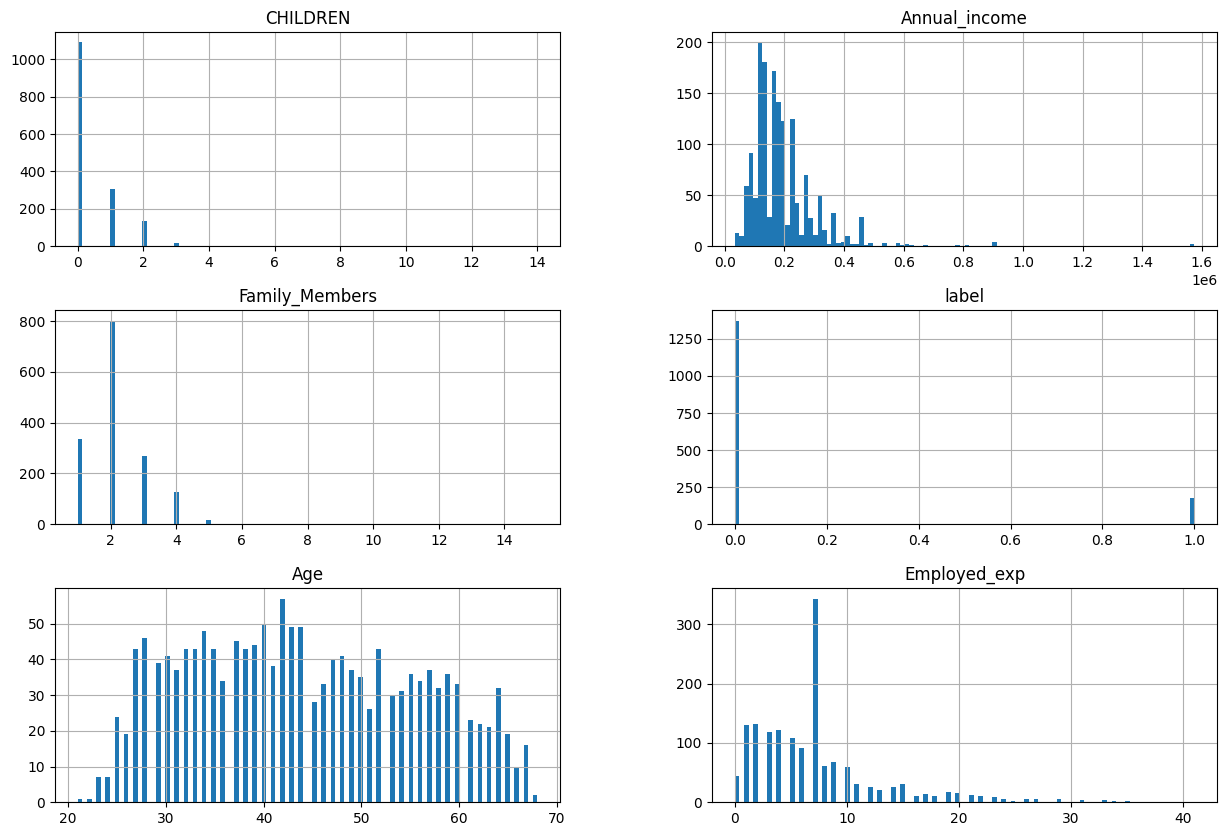

In [ ]:
#Histogram is used to see the distribution of a numerical value
data.hist(bins=100,figsize=(15,10))
plt.show()

# Hypothesis test
between annual income vs cradit card Application approval

In [ ]:
import numpy as np
from scipy import stats

# Separate annual incomes for approved and not approved applications
approved_incomes = data[data['label'] == 1]['Annual_income']
not_approved_incomes = data[data['label'] == 0]['Annual_income']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(approved_incomes, not_approved_incomes, equal_var=True)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Set significance level (e.g., 0.05)
alpha = 0.05

# Compare p-value to significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in annual incomes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in annual incomes.")


T-statistic: 0.9606540345622575
P-value: 0.3368763675425366
Fail to reject the null hypothesis: There is no significant difference in annual incomes.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1548 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   int64  
 4   Annual_income    1548 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Type_Occupation  1548 non-null   object 
 10  Family_Members   1548 non-null   int64  
 11  label            1548 non-null   int64  
 12  Age              1548 non-null   float64
 13  Employed_exp     1548 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 169.4+ KB



# Relation between categorical variables

In [ ]:
# correlation between one dependent with respect to all other independent

data.corr(method='spearman')

<ipython-input-42-e2a5574c2998>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='spearman')


,CHILDREN,Annual_income,Family_Members,label,Age,Employed_exp
CHILDREN,1.000000,0.066078,0.814579,-0.016235,-0.335422,-0.039981
Annual_income,0.066078,1.000000,0.041299,0.006064,-0.110507,0.022007
Family_Members,0.814579,0.041299,1.000000,-0.026446,-0.275288,-0.005419
label,-0.016235,0.006064,-0.026446,1.000000,0.045304,-0.102201
Age,-0.335422,-0.110507,-0.275288,0.045304,1.000000,0.305670
Employed_exp,-0.039981,0.022007,-0.005419,-0.102201,0.305670,1.000000


<ipython-input-43-7925e51fc650>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), annot=True)


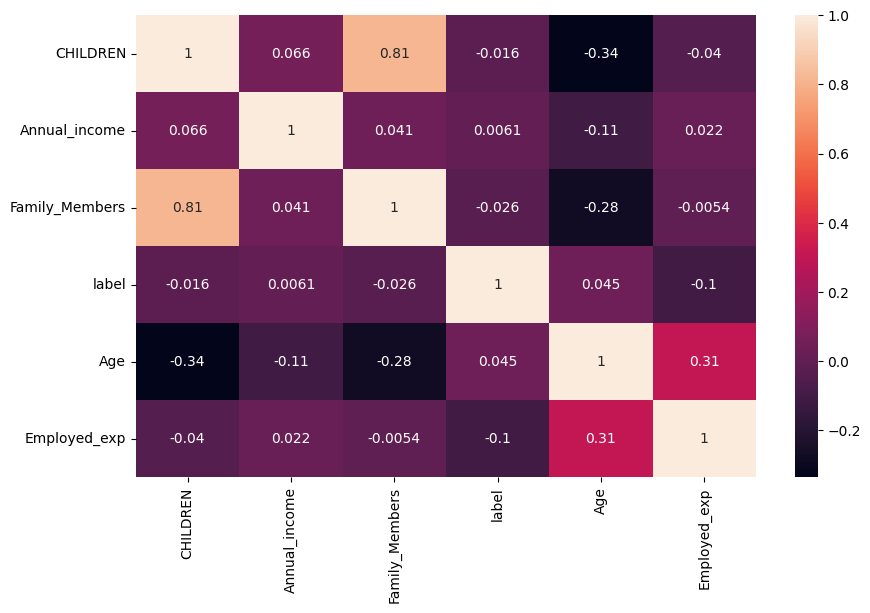

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(method='spearman'), annot=True)
plt.show()

<ipython-input-44-a7090cea8385>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual_income']) # Annual_income value is skwed in right side


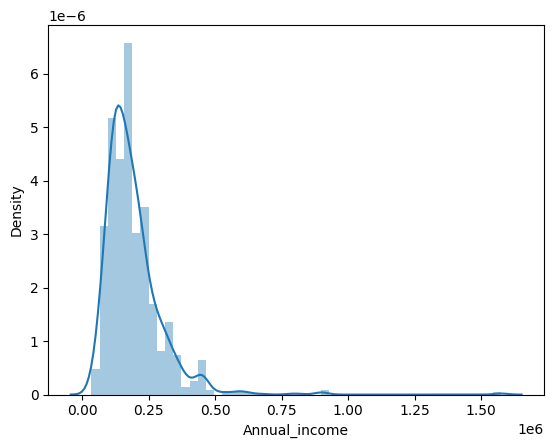

In [ ]:
sns.distplot(data['Annual_income']) # Annual_income value is skwed in right side
plt.show()

#Feature Engineering

In [ ]:
Data=data.copy()  # copy the dataframe data to Data , to keep orginal dataframe

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data["NEW_GENDER"] = le.fit_transform(Data["GENDER"])
Data["NEW_Car_Owner"] = le.fit_transform(Data["Car_Owner"])
Data["NEW_Propert_Owner"] = le.fit_transform(Data["Propert_Owner"])
Data["NEW_Marital_status"] = le.fit_transform(Data["Marital_status"])
Data["NEW_EDUCATION"] = le.fit_transform(Data["EDUCATION"])
Data["NEW_Type_Occupation"] = le.fit_transform(Data["Type_Occupation"])
Data["NEW_Type_Income"] = le.fit_transform(Data["Type_Income"])
Data["NEW_Housing_type"] = le.fit_transform(Data["Housing_type"])


In [ ]:
# Square Transformation of "Annual_income"

Data["NEW_Annual_income"] = np.square(Data["Annual_income"])
sns.distplot(Data["NEW_Annual_income"])

In [ ]:
Data["NEW_Annual_income"]

0       3.240000e+10
1       9.922500e+10
2       9.922500e+10
3       2.772225e+10
4       9.922500e+10
            ...     
1543    2.772225e+10
1544    5.062500e+10
1545    3.240000e+10
1546    7.290000e+10
1547    5.062500e+10
Name: NEW_Annual_income, Length: 1548, dtype: float64

In [ ]:
Data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,...,Employed_exp,NEW_Annual_income,NEW_GENDER,NEW_Car_Owner,NEW_Propert_Owner,NEW_Marital_status,NEW_EDUCATION,NEW_Type_Occupation,NEW_Type_Income,NEW_Housing_type
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,Other,...,7.0,3.240000e+10,1,1,1,1,1,12,1,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,Other,...,2.0,9.922500e+10,0,1,0,1,1,12,0,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,Other,...,2.0,9.922500e+10,0,1,0,1,1,12,0,1
3,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,Other,...,2.0,2.772225e+10,0,1,0,1,1,12,0,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,Other,...,2.0,9.922500e+10,0,1,0,1,1,12,0,1


In [ ]:
Data.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Type_Occupation', 'Family_Members', 'label', 'Age', 'Employed_exp',
       'NEW_Annual_income', 'NEW_GENDER', 'NEW_Car_Owner', 'NEW_Propert_Owner',
       'NEW_Marital_status', 'NEW_EDUCATION', 'NEW_Type_Occupation',
       'NEW_Type_Income', 'NEW_Housing_type'],
      dtype='object')

In [ ]:
X=Data[['NEW_Annual_income','NEW_GENDER', 'NEW_Car_Owner', 'NEW_Propert_Owner','CHILDREN','NEW_Marital_status', 'NEW_Type_Income','NEW_EDUCATION',
        'Family_Members','Age', 'Employed_exp','NEW_Type_Occupation','NEW_Housing_type','label']]
X.head()

,NEW_Annual_income,NEW_GENDER,NEW_Car_Owner,NEW_Propert_Owner,CHILDREN,NEW_Marital_status,NEW_Type_Income,NEW_EDUCATION,Family_Members,Age,Employed_exp,NEW_Type_Occupation,NEW_Housing_type,label
0,3.240000e+10,1,1,1,0,1,1,1,2,51.0,7.0,12,1,1
1,9.922500e+10,0,1,0,0,1,0,1,2,37.0,2.0,12,1,1
2,9.922500e+10,0,1,0,0,1,0,1,2,43.0,2.0,12,1,1
3,2.772225e+10,0,1,0,0,1,0,1,2,37.0,2.0,12,1,1
4,9.922500e+10,0,1,0,0,1,0,1,2,37.0,2.0,12,1,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NEW_Annual_income    1548 non-null   float64
 1   NEW_GENDER           1548 non-null   int64  
 2   NEW_Car_Owner        1548 non-null   int64  
 3   NEW_Propert_Owner    1548 non-null   int64  
 4   CHILDREN             1548 non-null   int64  
 5   NEW_Marital_status   1548 non-null   int64  
 6   NEW_Type_Income      1548 non-null   int64  
 7   NEW_EDUCATION        1548 non-null   int64  
 8   Family_Members       1548 non-null   int64  
 9   Age                  1548 non-null   float64
 10  Employed_exp         1548 non-null   float64
 11  NEW_Type_Occupation  1548 non-null   int64  
 12  NEW_Housing_type     1548 non-null   int64  
 13  label                1548 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 169.4 KB


In [ ]:
# spliting the data
x = X.iloc[:,0:-1]
y = X.iloc[:,-1]

In [ ]:
x.head()

,NEW_Annual_income,NEW_GENDER,NEW_Car_Owner,NEW_Propert_Owner,CHILDREN,NEW_Marital_status,NEW_Type_Income,NEW_EDUCATION,Family_Members,Age,Employed_exp,NEW_Type_Occupation,NEW_Housing_type
0,3.240000e+10,1,1,1,0,1,1,1,2,51.0,7.0,12,1
1,9.922500e+10,0,1,0,0,1,0,1,2,37.0,2.0,12,1
2,9.922500e+10,0,1,0,0,1,0,1,2,43.0,2.0,12,1
3,2.772225e+10,0,1,0,0,1,0,1,2,37.0,2.0,12,1
4,9.922500e+10,0,1,0,0,1,0,1,2,37.0,2.0,12,1


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
x.columns

Index(['NEW_Annual_income', 'NEW_GENDER', 'NEW_Car_Owner', 'NEW_Propert_Owner',
       'CHILDREN', 'NEW_Marital_status', 'NEW_Type_Income', 'NEW_EDUCATION',
       'Family_Members', 'Age', 'Employed_exp', 'NEW_Type_Occupation',
       'NEW_Housing_type'],
      dtype='object')

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_new = sc.fit_transform(x)
X_new = pd.DataFrame(X_new,columns=['NEW_Annual_income', 'NEW_GENDER', 'NEW_Car_Owner', 'NEW_Propert_Owner',
       'CHILDREN', 'NEW_Marital_status', 'NEW_Type_Income', 'NEW_EDUCATION',
       'Family_Members', 'Age', 'Employed_exp', 'NEW_Type_Occupation',
       'NEW_Housing_type'])
X_new.head(3)



,NEW_Annual_income,NEW_GENDER,NEW_Car_Owner,NEW_Propert_Owner,CHILDREN,NEW_Marital_status,NEW_Type_Income,NEW_EDUCATION,Family_Members,Age,Employed_exp,NEW_Type_Occupation,NEW_Housing_type
0,-0.153098,1.313527,1.216869,0.729845,-0.531645,-0.44431,-0.684595,-1.533725,-0.170453,0.613052,-0.041910,0.693208,-0.30149
1,0.458473,-0.761309,1.216869,-1.370155,-0.531645,-0.44431,-1.471346,-1.533725,-0.170453,-0.602508,-0.875803,0.693208,-0.30149
2,0.458473,-0.761309,1.216869,-1.370155,-0.531645,-0.44431,-1.471346,-1.533725,-0.170453,-0.081553,-0.875803,0.693208,-0.30149


In [ ]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NEW_Annual_income    1548 non-null   float64
 1   NEW_GENDER           1548 non-null   float64
 2   NEW_Car_Owner        1548 non-null   float64
 3   NEW_Propert_Owner    1548 non-null   float64
 4   CHILDREN             1548 non-null   float64
 5   NEW_Marital_status   1548 non-null   float64
 6   NEW_Type_Income      1548 non-null   float64
 7   NEW_EDUCATION        1548 non-null   float64
 8   Family_Members       1548 non-null   float64
 9   Age                  1548 non-null   float64
 10  Employed_exp         1548 non-null   float64
 11  NEW_Type_Occupation  1548 non-null   float64
 12  NEW_Housing_type     1548 non-null   float64
dtypes: float64(13)
memory usage: 157.3 KB


# Model Building

In [ ]:
# Data Split into Training and Testing Data (Training - 70 % and Testing -30%)
X_train,X_test,Y_train,Y_test = train_test_split(X_new ,y, test_size=.30,random_state=40)
print("Train_size",X_train.shape)
print("Test_size",X_test.shape)

Train_size (1083, 13)
Test_size (465, 13)


#Applying ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable.

# 1. LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
# prediction
pred_test1 = LR.predict(X_test)
accuracy_score(Y_test,pred_test1)

0.886021505376344

In [ ]:
x_test = X_test.copy()
x_test["Actual"] = Y_test
x_test["pred"] = pred_test1
x_test.head()

,NEW_Annual_income,NEW_GENDER,NEW_Car_Owner,NEW_Propert_Owner,CHILDREN,NEW_Marital_status,NEW_Type_Income,NEW_EDUCATION,Family_Members,Age,Employed_exp,NEW_Type_Occupation,NEW_Housing_type,Actual,pred
811,6.963358,1.313527,1.216869,0.729845,2.044213,-0.444310,-1.471346,-1.533725,1.940442,-1.470765,-0.709024,0.216069,-0.301490,0,0
390,0.407323,1.313527,1.216869,-1.370155,-0.531645,-0.444310,0.888906,0.691398,-0.170453,0.005272,-0.375467,0.216069,-0.301490,0,0
660,-0.222595,-0.761309,-0.821781,-1.370155,-0.531645,0.576153,-1.471346,-1.533725,-1.225901,-0.081553,-1.042581,0.693208,3.856254,0,0
993,-0.074335,1.313527,1.216869,-1.370155,-0.531645,-0.444310,-1.471346,0.691398,-0.170453,-1.297113,-0.208689,0.216069,-0.301490,0,0
702,-0.314515,-0.761309,-0.821781,0.729845,-0.531645,-0.444310,-0.684595,0.691398,-0.170453,1.568135,-0.041910,0.693208,-0.301490,0,0


In [ ]:
confusion_matrix(Y_test,pred_test1)

array([[412,   0],
       [ 53,   0]])

### cross validation (KFold,cross_val_score )

In [ ]:
from sklearn.model_selection import KFold,cross_val_score,ShuffleSplit

In [ ]:
num_folds = 5
# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# 100 we created 5 split in data - each split - 20%

In [ ]:
# Perform cross-validation
scores = cross_val_score(LR, X_new ,y, cv=kf)

In [ ]:
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.90322581 0.90967742 0.8516129  0.86731392 0.90291262]
Average Score: 0.8869485332498173


#2. KNN MODEL


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
knnc.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred_test2 = knnc.predict(X_test)
accuracy_score(Y_test,pred_test2)


0.8903225806451613

In [ ]:
x_test = X_test.copy()
x_test["Actual"] = Y_test
x_test["pred"] = pred_test2
x_test

,NEW_Annual_income,NEW_GENDER,NEW_Car_Owner,NEW_Propert_Owner,CHILDREN,NEW_Marital_status,NEW_Type_Income,NEW_EDUCATION,Family_Members,Age,Employed_exp,NEW_Type_Occupation,NEW_Housing_type,Actual,pred
811,6.963358,1.313527,1.216869,0.729845,2.044213,-0.444310,-1.471346,-1.533725,1.940442,-1.470765,-0.709024,0.216069,-0.301490,0,0
390,0.407323,1.313527,1.216869,-1.370155,-0.531645,-0.444310,0.888906,0.691398,-0.170453,0.005272,-0.375467,0.216069,-0.301490,0,0
660,-0.222595,-0.761309,-0.821781,-1.370155,-0.531645,0.576153,-1.471346,-1.533725,-1.225901,-0.081553,-1.042581,0.693208,3.856254,0,0
993,-0.074335,1.313527,1.216869,-1.370155,-0.531645,-0.444310,-1.471346,0.691398,-0.170453,-1.297113,-0.208689,0.216069,-0.301490,0,0
702,-0.314515,-0.761309,-0.821781,0.729845,-0.531645,-0.444310,-0.684595,0.691398,-0.170453,1.568135,-0.041910,0.693208,-0.301490,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,-0.375487,1.313527,-0.821781,0.729845,-0.531645,1.596616,0.888906,0.691398,-1.225901,-1.297113,-1.042581,-1.215349,-0.301490,0,0
1400,-0.333789,-0.761309,-0.821781,-1.370155,0.756284,2.617078,0.888906,0.691398,-0.170453,0.960355,-0.542246,0.693208,-0.301490,0,0
739,0.013694,1.313527,1.216869,0.729845,-0.531645,-0.444310,0.888906,0.691398,-0.170453,0.786704,0.124868,-0.261070,-0.301490,0,0
971,0.333379,1.313527,1.216869,0.729845,0.756284,-0.444310,-1.471346,-1.533725,0.884994,-0.862985,0.291647,0.693208,-0.301490,0,0


In [ ]:
confusion_matrix(Y_test,pred_test2)

array([[409,   3],
       [ 48,   5]])

### cross validation (KFold,cross_val_score )

In [ ]:
num_folds = 5
# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# 100 we created 5 split in data - each split - 20%

In [ ]:
# Perform cross-validation
scores = cross_val_score(knnc,X_new,y, cv=kf)

In [ ]:
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.88387097 0.87741935 0.83870968 0.85760518 0.89644013]
Average Score: 0.8708090614886732


#3. DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
pred_test3 = dtc.predict(X_test)
accuracy_score(Y_test,pred_test3)

0.853763440860215

In [ ]:
confusion_matrix(Y_test,pred_test3)

array([[373,  39],
       [ 29,  24]])

### cross validation (KFold,cross_val_score )

In [ ]:
num_folds = 5
# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# 100 we created 5 split in data - each split - 20%

In [ ]:
# Perform cross-validation
scores = cross_val_score(dtc,X_new,y, cv=kf)

In [ ]:
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.87419355 0.87096774 0.83548387 0.84789644 0.87055016]
Average Score: 0.859818352646414


#4.RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [ ]:
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
pred_test4 = RF.predict(X_test)
accuracy_score(Y_test,pred_test4)

0.9247311827956989

### cross validation (KFold,cross_val_score )

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
num_folds = 5
# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# 100 we created 5 split in data - each split - 20%

In [ ]:
# Perform cross-validation
scores = cross_val_score(RF,X_new,y, cv=kf)

In [ ]:
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.93548387 0.93870968 0.90322581 0.91585761 0.93527508]
Average Score: 0.9257104081845704


# 5. xgboost

!pip install xgboost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [ ]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_test5= model.predict(X_test)
accuracy_score(Y_test,pred_test5)

0.9118279569892473

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test,pred_test5)

array([[403,   9],
       [ 32,  21]])

### cross validation (KFold,cross_val_score )

In [ ]:
num_folds = 5
# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# 100 we created 5 split in data - each split - 20%

In [ ]:
# Perform cross-validation
scores = cross_val_score(model,X_new,y, cv=kf)

In [ ]:
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.93870968 0.92580645 0.89032258 0.89644013 0.9223301 ]
Average Score: 0.9147217872429273



# 6.SVC- support vector classifier

In [ ]:
from sklearn.svm import SVC,SVR

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train,Y_train)

SVC()

In [ ]:
svc.score(X_train,Y_train)

0.8873499538319483

In [ ]:
pred_test6 = svc.predict(X_test)
accuracy_score(Y_test,pred_test6)

0.886021505376344

### cross validation (KFold,cross_val_score )

In [ ]:
num_folds = 5
# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# 100 we created 5 split in data - each split - 20%

In [ ]:
# Perform cross-validation
scores = cross_val_score(svc,X_new,y, cv=kf)

In [ ]:
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.90322581 0.90967742 0.8516129  0.86731392 0.90291262]
Average Score: 0.8869485332498173



# Conclusion

Hence i got accuracy on different classification:-

1.Logisitic regression got accuracy 88% & Cross Validation Avg scores-88%

2.KNN model got accuracy 89% & Cross Validation Avg scores-87%  

3.DecisionTree got accuracy 85% & Cross Validation Avg scores-85%

4.Random Forest got accuracy 92% & Cross Validation Avg scores-92%

5.xg boosting got accuracy 91% & Cross Validation Avg scores-91%

6.SVC- got accuracy 88% & Cross Validation scores-88%

i have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable.

After feature selection i used 6 machine learning models and achieved quite good accuracy 92% in Random Forest for predicting the credit card approval.


In [ ]:
# saving the dataframe for SQL task
data.to_csv('file1.csv')